In [1]:
import numpy as np

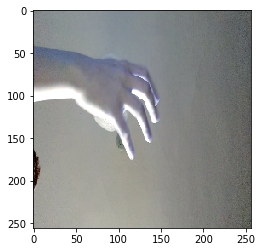

In [2]:
#test it on a csv image
from WritingCSV import loadImage

%matplotlib inline
import matplotlib.pyplot as plt

gen = loadImage('images_all_csv.txt')

for i in range(100):
    movs, labels, shape, image = next(gen)

plt.imshow(image.astype(np.uint8))



In [3]:
print(shape)

[256, 256, 3]


# the landmark model

In [4]:
import numpy as np
import tensorflow as tf

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="hand_landmark.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
print('input details : {}'.format(input_details))

output_details = interpreter.get_output_details()
print('output details : {}'.format(output_details))

# Test model on random input data.
input_shape = input_details[0]['shape']

#input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)

input_data = image.reshape(input_shape).astype(np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])

output_data.shape

input details : [{'name': 'input_1', 'index': 0, 'shape': array([  1, 256, 256,   3], dtype=int32), 'shape_signature': array([], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
output details : [{'name': 'ld_21_2d', 'index': 893, 'shape': array([ 1, 42], dtype=int32), 'shape_signature': array([], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'output_handflag', 'index': 894, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), '

(1, 42)

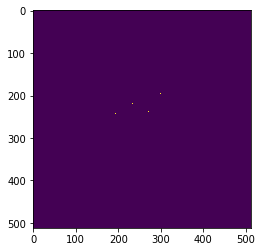

In [5]:
#i have read that these are the 21 landmarks of the hand
#the 41 ouputs are 2*21, so I will suppose that they are X and Y
#so lets plot them and see

#problem is that the image is only 256 long
#so these will not fit as X and Y
#ill try to plot them anyway to half thier chords

#def draw in surounding frames
def draw_output(output_data):
    data = np.full([512, 512], 0.0)
    for coord in output_data.reshape(21, 2):
        #make it a bigger dot
        data[int(coord[0])][int(coord[1])] = 1.0
    return data

plt.imshow(draw_output(output_data))

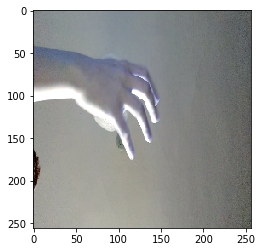

In [6]:
    
plt.imshow(image.astype(np.uint8))

#i believe that this modle attempts to display the choordinates for 4 points allong each finger, and 1 ant the base of the hand

# lets try on a different picture

[256, 256, 3]


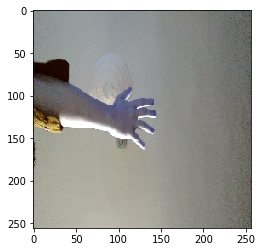

In [7]:
for i in range(200):
    movs, labels, shape, image = next(gen)

plt.imshow(image.astype(np.uint8))
print(shape)

In [8]:
def get_image_output(image):

    # Load TFLite model and allocate tensors.
    interpreter = tf.lite.Interpreter(model_path="hand_landmark.tflite")
    interpreter.allocate_tensors()

    # Get input and output tensors.
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Test model on random input data.
    input_shape = input_details[0]['shape']
    
    #input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)

    input_data = image.reshape(input_shape).astype(np.float32)

    interpreter.set_tensor(input_details[0]['index'], input_data)

    interpreter.invoke()

    # The function `get_tensor()` returns a copy of the tensor data.
    # Use `tensor()` in order to get a pointer to the tensor.
    output_data = interpreter.get_tensor(output_details[0]['index'])
    
    return output_data

/Users/billy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


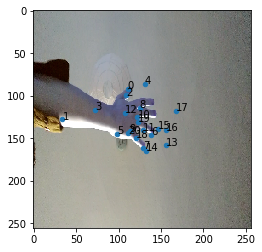

In [9]:

def process_and_display(image):
    x, y = get_image_output(image).reshape(2, 21) / 2
    x = [256 - item for item in x]
    f, ax = plt.subplots(1)
    ax.scatter(x, y, s=20)
    for i, txt in enumerate(range(21)):
        ax.annotate(txt, (x[i], y[i]))
    f.show()
    plt.imshow(image.astype(np.uint8))
    
process_and_display(image)

In [ ]:
    for i in range(20):
        movs, labels, shape, image = next(gen)
    process_and_display(image)

In [ ]:
for i in range(20):
    movs, labels, shape, image = next(gen)
process_and_display(image)

In [ ]:
for i in range(200):
    movs, labels, shape, image = next(gen)
process_and_display(image)

In [ ]:
for i in range(200):
    movs, labels, shape, image = next(gen)
process_and_display(image)

In [ ]:
for i in range(200):
    movs, labels, shape, image = next(gen)
process_and_display(image)

In [ ]:
for i in range(200):
    movs, labels, shape, image = next(gen)
process_and_display(image)

In [ ]:
for i in range(200):
    movs, labels, shape, image = next(gen)
process_and_display(image)

In [ ]:
for i in range(200):
    movs, labels, shape, image = next(gen)
process_and_display(image)

In [ ]:
for i in range(200):
    movs, labels, shape, image = next(gen)
process_and_display(image)

In [ ]:
for i in range(200):
    movs, labels, shape, image = next(gen)
process_and_display(image)

# try and train a moel only in this infomation

In [37]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D 	
from keras.utils import np_utils
from keras.metrics import cosine_proximity



In [43]:
model = Sequential()

#creating the layers, 

model.add(Dense(42, input_shape=(1, 42), kernel_initializer='normal', activation='relu'))
model.add(Dense(21, kernel_initializer='normal'))
#model.add(Dense(126))
#model.add(Dropout(0.5))
#model.add(Dense(64, kernel_initializer='normal'))


#the output
model.add(Dense(3, activation = 'sigmoid', kernel_initializer='normal'))

model.compile(loss='cosine_proximity',
              optimizer='adam',
              metrics=['cosine_similarity'])

In [44]:
def batchGen(batchSize):
    
    #a genorator function to deliver images
    
    while True:
        
        batch = []
        labels = []
        imgGen = loadImage('images_all_csv.txt')
        
        for i in range(batchSize):
            
            movs, label, shape, image = next(gen)
            
            if not image.any:
                print("image not genorated")
                continue
            
            input_data = image.reshape(input_shape).astype(np.float32)

            interpreter.set_tensor(input_details[0]['index'], input_data)
            
            interpreter.invoke()

            output = interpreter.get_tensor(output_details[0]['index'])
            
            batch.append(output)
            labels.append(np.asarray([label]))
            
        yield np.asarray(batch), np.asarray(labels)

In [13]:
class Batcher:
    
    def __init__(self): 
        
        self.imageoutputs = []
        self.labels = []
        self.images = []

        imgGen = loadImage('images_all_csv.txt')
        print('loading data')
        for i in range(1200): #why1200?
            if i % 200 == 0:
                print('index : {}'.format(i))

            movs, label, shape, image = next(imgGen)
            #'get the output'
            self.images.append(image)
            input_data = image.reshape(input_shape).astype(np.float32)
            interpreter.set_tensor(input_details[0]['index'], input_data)
            interpreter.invoke()
            output = interpreter.get_tensor(output_details[0]['index'])
            self.imageoutputs.append(output)
            self.labels.append(np.asarray([label]))

        print ('data loaded')
        
    def fasterBatchGen(self, batchSize):
    
        #where is ind incremented
        ind = 0
        while True:
            
            try:

                if ind + batchSize >= 1200:
                    ind = 0

                yield np.asarray(self.imageoutputs[ind:ind+batchSize]), np.asarray(self.labels[ind:ind+batchSize])

            except Exception as e:

                print(e)
            ind += 1
                
batcher = Batcher() 

loading data
index : 0
index : 200
index : 400
index : 600
index : 800
index : 1000
data loaded


In [59]:
H = model.fit_generator(batcher.fasterBatchGen(512), 500, epochs=500, verbose=1,shuffle=True)

Epoch 1/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9515 - cosine_similarity: 0.9515
Epoch 2/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9517 - cosine_similarity: 0.9517
Epoch 3/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9464 - cosine_similarity: 0.9464: 0s - loss: -0.9459 - cosine_similarity: 0.94
Epoch 4/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9526 - cosine_similarity: 0.9526
Epoch 5/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9532 - cosine_similarity: 0.9532
Epoch 6/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9495 - cosine_similarity: 0.9495
Epoch 7/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9477 - cosine_similarity: 0.9477
Epoch 8/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9535 - cosine_similarity: 0.9535
Epoch 9/500
500/500 [==============================] - 1s 1ms/step

500/500 [==============================] - 1s 1ms/step - loss: -0.9501 - cosine_similarity: 0.9501
Epoch 74/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9555 - cosine_similarity: 0.9555
Epoch 75/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9537 - cosine_similarity: 0.9537
Epoch 76/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9480 - cosine_similarity: 0.9480
Epoch 77/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9547 - cosine_similarity: 0.9547
Epoch 78/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9535 - cosine_similarity: 0.9535
Epoch 79/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9522 - cosine_similarity: 0.9522
Epoch 80/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9485 - cosine_similarity: 0.9485
Epoch 81/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9559 - cosine_similarity: 0.9559
Epoch

500/500 [==============================] - 1s 1ms/step - loss: -0.9522 - cosine_similarity: 0.9522
Epoch 146/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9502 - cosine_similarity: 0.9502
Epoch 147/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9562 - cosine_similarity: 0.9562
Epoch 148/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9553 - cosine_similarity: 0.9553
Epoch 149/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9497 - cosine_similarity: 0.9497
Epoch 150/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9538 - cosine_similarity: 0.9538
Epoch 151/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9551 - cosine_similarity: 0.9551
Epoch 152/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9542 - cosine_similarity: 0.9542
Epoch 153/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9492 - cosine_similarity: 0.94

500/500 [==============================] - 1s 1ms/step - loss: -0.9562 - cosine_similarity: 0.9562
Epoch 218/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9536 - cosine_similarity: 0.9536
Epoch 219/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9497 - cosine_similarity: 0.9497
Epoch 220/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9567 - cosine_similarity: 0.9567
Epoch 221/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9566 - cosine_similarity: 0.9566
Epoch 222/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9515 - cosine_similarity: 0.9515
Epoch 223/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9514 - cosine_similarity: 0.9514
Epoch 224/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9575 - cosine_similarity: 0.9575
Epoch 225/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9556 - cosine_similarity: 0.95

500/500 [==============================] - 1s 1ms/step - loss: -0.9510 - cosine_similarity: 0.9510
Epoch 290/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9575 - cosine_similarity: 0.9575
Epoch 291/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9544 - cosine_similarity: 0.9544
Epoch 292/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9500 - cosine_similarity: 0.9500
Epoch 293/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9566 - cosine_similarity: 0.9566
Epoch 294/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9568 - cosine_similarity: 0.9568
Epoch 295/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9530 - cosine_similarity: 0.9530
Epoch 296/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9505 - cosine_similarity: 0.9505
Epoch 297/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9566 - cosine_similarity: 0.95

500/500 [==============================] - 1s 1ms/step - loss: -0.9504 - cosine_similarity: 0.9504
Epoch 362/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9516 - cosine_similarity: 0.9516
Epoch 363/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9570 - cosine_similarity: 0.9570
Epoch 364/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9564 - cosine_similarity: 0.9564
Epoch 365/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9505 - cosine_similarity: 0.9505
Epoch 366/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9557 - cosine_similarity: 0.9557
Epoch 367/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9568 - cosine_similarity: 0.9568
Epoch 368/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9544 - cosine_similarity: 0.9544
Epoch 369/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9487 - cosine_similarity: 0.94

500/500 [==============================] - 1s 1ms/step - loss: -0.9571 - cosine_similarity: 0.9571
Epoch 434/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9526 - cosine_similarity: 0.9526
Epoch 435/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9508 - cosine_similarity: 0.9508
Epoch 436/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9562 - cosine_similarity: 0.9562
Epoch 437/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9568 - cosine_similarity: 0.9568
Epoch 438/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9516 - cosine_similarity: 0.9516
Epoch 439/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9527 - cosine_similarity: 0.9527
Epoch 440/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9576 - cosine_similarity: 0.9576
Epoch 441/500
500/500 [==============================] - 1s 1ms/step - loss: -0.9560 - cosine_similarity: 0.95

In [60]:
score = model.evaluate(np.asarray(batcher.imageoutputs), np.asarray(batcher.labels), verbose=1)
print(score)


1200/1200 [==============================] - 0s 14us/step
[-0.9271912288665771, 0.9271913766860962]


In [61]:
plt.plot(model.history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

KeyError: 'accuracy'

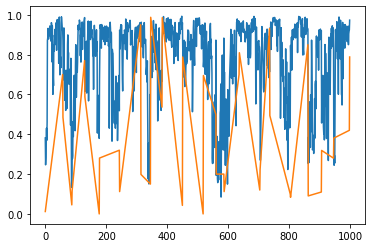

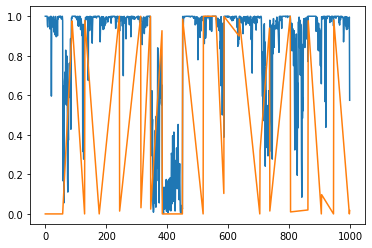

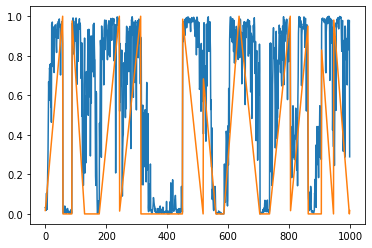

In [62]:
dist_pred = []
dist_lab = []
open_pred = []
open_lab = []
rot_pred = []
rot_lab = []
    
for index in range(1000):
    

    pred = model.predict(np.asarray([batcher.imageoutputs[index]]))[0][0]
    dist_pred.append( pred[0] )
    open_pred.append( pred[1] )
    rot_pred.append( pred[2] )

    lab = batcher.labels[index][0]
    dist_lab.append( lab[0]  )
    open_lab.append( lab[1] )
    rot_lab.append( lab[2] )


plt.plot(dist_pred)
plt.plot(dist_lab)
plt.show()

plt.plot(open_pred)
plt.plot(open_lab)
plt.show()

plt.plot(rot_pred)
plt.plot(rot_lab)
plt.show()
#plt.imshow(batcher.images[index].astype(np.int32))
#plt.show()

# This could be overfitting, i should split the training and results

In [63]:
#need to save this AI

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [64]:
from tensorflow.keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


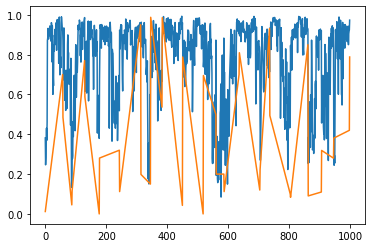

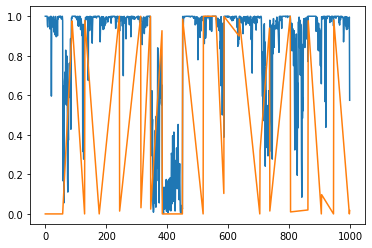

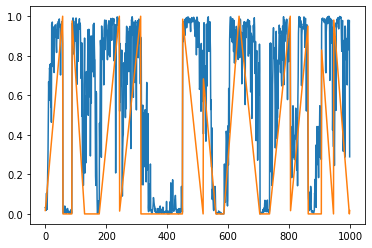

In [65]:
#test loaded model
dist_pred = []
dist_lab = []
open_pred = []
open_lab = []
rot_pred = []
rot_lab = []
    
for index in range(1000):

    pred = loaded_model.predict(np.asarray([batcher.imageoutputs[index]]))[0][0]
    dist_pred.append( pred[0] )
    open_pred.append( pred[1] )
    rot_pred.append( pred[2] )

    lab = batcher.labels[index][0]
    dist_lab.append( lab[0]  )
    open_lab.append( lab[1] )
    rot_lab.append( lab[2] )


plt.plot(dist_pred)
plt.plot(dist_lab)
plt.show()

plt.plot(open_pred)
plt.plot(open_lab)
plt.show()

plt.plot(rot_pred)
plt.plot(rot_lab)
plt.show()


In [70]:
# put the above results through a lowpass
import scipy.signal as sig

#design a lowpass
b, a = sig.butter(2, 0.05, 'lp', output='ba')

print (b)
print (a)

[0.00554272 0.01108543 0.00554272]
[ 1.         -1.77863178  0.80080265]


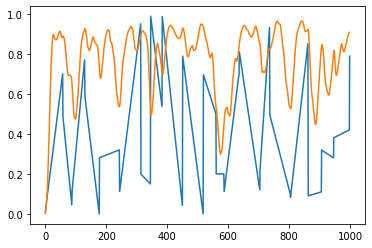

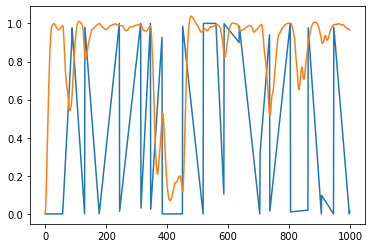

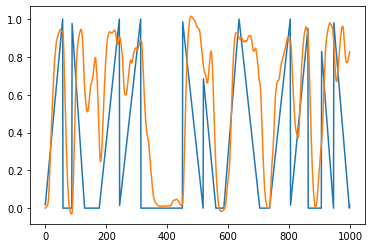

In [71]:



dist_filtered = sig.lfilter(b, a, np.asarray(dist_pred))
open_filtered = sig.lfilter(b, a, np.asarray(open_pred))
rot_filtered = sig.lfilter(b, a, np.asarray(rot_pred))

#plt.plot(dist_pred)
plt.plot(dist_lab)
plt.plot(dist_filtered)
plt.show()

#plt.plot(open_pred)
plt.plot(open_lab)
plt.plot(open_filtered)
plt.show()

#plt.plot(rot_pred)
plt.plot(rot_lab)
plt.plot(rot_filtered)
plt.show()

In [58]:
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tfmodel = converter.convert()
open ("TestModel.tflite" , "wb") .write(tfmodel)

13692